In [88]:
import matplotlib.pyplot as plt
from scipy.io import arff
import seaborn as sns
import pandas as pd  
import numpy as np

In [89]:
data=arff.loadarff("../data/credit_fraud.arff")
df=pd.DataFrame(data[0])
df = df.map(lambda x: x.decode() if isinstance(x, bytes) else x)

# EDA

In [90]:
df.head(10)

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
5,no checking,36.0,existing paid,education,9055.0,no known savings,1<=X<4,2.0,male single,none,...,no known property,35.0,none,for free,1.0,unskilled resident,2.0,yes,yes,good
6,no checking,24.0,existing paid,furniture/equipment,2835.0,500<=X<1000,>=7,3.0,male single,none,...,life insurance,53.0,none,own,1.0,skilled,1.0,none,yes,good
7,0<=X<200,36.0,existing paid,used car,6948.0,<100,1<=X<4,2.0,male single,none,...,car,35.0,none,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
8,no checking,12.0,existing paid,radio/tv,3059.0,>=1000,4<=X<7,2.0,male div/sep,none,...,real estate,61.0,none,own,1.0,unskilled resident,1.0,none,yes,good
9,0<=X<200,30.0,critical/other existing credit,new car,5234.0,<100,unemployed,4.0,male mar/wid,none,...,car,28.0,none,own,2.0,high qualif/self emp/mgmt,1.0,none,yes,bad


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   over_draft              1000 non-null   object 
 1   credit_usage            1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   current_balance         1000 non-null   float64
 5   Average_Credit_Balance  1000 non-null   object 
 6   employment              1000 non-null   object 
 7   location                1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  cc_age                  1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

### Variables categoricas

In [92]:
var_cat=df.select_dtypes(include='object').columns
print("="*50)
for c in var_cat:
    print(df[c].value_counts(normalize=True) * 100)
    print("="*50)

over_draft
no checking    39.4
<0             27.4
0<=X<200       26.9
>=200           6.3
Name: proportion, dtype: float64
credit_history
existing paid                     53.0
critical/other existing credit    29.3
delayed previously                 8.8
all paid                           4.9
no credits/all paid                4.0
Name: proportion, dtype: float64
purpose
radio/tv               28.0
new car                23.4
furniture/equipment    18.1
used car               10.3
business                9.7
education               5.0
repairs                 2.2
domestic appliance      1.2
other                   1.2
retraining              0.9
Name: proportion, dtype: float64
Average_Credit_Balance
<100                60.3
no known savings    18.3
100<=X<500          10.3
500<=X<1000          6.3
>=1000               4.8
Name: proportion, dtype: float64
employment
1<=X<4        33.9
>=7           25.3
4<=X<7        17.4
<1            17.2
unemployed     6.2
Name: proportion, dtype: 

In [93]:
df.isnull().sum()

over_draft                0
credit_usage              0
credit_history            0
purpose                   0
current_balance           0
Average_Credit_Balance    0
employment                0
location                  0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
cc_age                    0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

No hay valores faltantes 

In [ ]:
# VARIABLE OBJETIVO
df["status"]=df["class"]
del df["class"]
df.status=(df.status=="bad").astype(int)
df["status"].value_counts(normalize=True) * 100

0    0
1    1
2    0
3    0
4    1
Name: status, dtype: int64

In [96]:
df.head(10)

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,status
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,0
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,1
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,0
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,0
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,1
5,no checking,36.0,existing paid,education,9055.0,no known savings,1<=X<4,2.0,male single,none,...,no known property,35.0,none,for free,1.0,unskilled resident,2.0,yes,yes,0
6,no checking,24.0,existing paid,furniture/equipment,2835.0,500<=X<1000,>=7,3.0,male single,none,...,life insurance,53.0,none,own,1.0,skilled,1.0,none,yes,0
7,0<=X<200,36.0,existing paid,used car,6948.0,<100,1<=X<4,2.0,male single,none,...,car,35.0,none,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes,0
8,no checking,12.0,existing paid,radio/tv,3059.0,>=1000,4<=X<7,2.0,male div/sep,none,...,real estate,61.0,none,own,1.0,unskilled resident,1.0,none,yes,0
9,0<=X<200,30.0,critical/other existing credit,new car,5234.0,<100,unemployed,4.0,male mar/wid,none,...,car,28.0,none,own,2.0,high qualif/self emp/mgmt,1.0,none,yes,1


In [98]:
var_cat=df.select_dtypes(include='object').columns.difference(['status'])
var_cat

Index(['Average_Credit_Balance', 'credit_history', 'employment',
       'foreign_worker', 'housing', 'job', 'other_parties',
       'other_payment_plans', 'over_draft', 'own_telephone', 'personal_status',
       'property_magnitude', 'purpose'],
      dtype='object')

In [99]:
print(f"DISTRIBUCION POR CLASE")
for c in var_cat:
    print(f"\n{'='*70}")
    print(f"Variable: {c}")
    print(f"{'='*70}")

    total=df[c].value_counts(normalize=True)
    bad=df[df['status'] == 1][c].value_counts(normalize=True)
    good=df[df['status'] == 0][c].value_counts(normalize=True)
    diff=bad-good
    
    tabla = pd.concat(
        [
            total,
            bad,
            good,
            diff
        ],
        axis=1
    )

    tabla.columns = ['Total_%', 'Status_1_%', 'Status_0_%','Distribution_Diff%']

    tabla = (
        tabla
        .mul(100)
        .round(2)
        .sort_values('Status_1_%', ascending=False)
    )

    print(tabla)


DISTRIBUCION POR CLASE

Variable: Average_Credit_Balance
                        Total_%  Status_1_%  Status_0_%  Distribution_Diff%
Average_Credit_Balance                                                     
<100                       60.3       72.33       55.14               17.19
100<=X<500                 10.3       11.33        9.86                1.48
no known savings           18.3       10.67       21.57              -10.90
500<=X<1000                 6.3        3.67        7.43               -3.76
>=1000                      4.8        2.00        6.00               -4.00

Variable: credit_history
                                Total_%  Status_1_%  Status_0_%  \
credit_history                                                    
existing paid                      53.0       56.33       51.57   
critical/other existing credit     29.3       16.67       34.71   
delayed previously                  8.8        9.33        8.57   
all paid                            4.9        9.3

In [100]:
print(f"CHURN RATE - RISK RATIO")
for c in var_cat:
    print(f"\n{'='*70}")
    print(f"Variable: {c}")
    print(f"{'='*70}")
    
    global_bad_rate = df['status'].mean()
    
    # Churn rate
    df_group = df.groupby(c)['status'].agg(['sum', 'count', 'mean'])
    df_group.columns = ['malos', 'total', 'churn_rate']
    
    # Risk ratio
    df_group['risk_ratio'] = df_group['churn_rate'] / global_bad_rate

    
    print(df_group.round(3))


CHURN RATE - RISK RATIO

Variable: Average_Credit_Balance
                        malos  total  churn_rate  risk_ratio
Average_Credit_Balance                                      
100<=X<500                 34    103       0.330       1.100
500<=X<1000                11     63       0.175       0.582
<100                      217    603       0.360       1.200
>=1000                      6     48       0.125       0.417
no known savings           32    183       0.175       0.583

Variable: credit_history
                                malos  total  churn_rate  risk_ratio
credit_history                                                      
all paid                           28     49       0.571       1.905
critical/other existing credit     50    293       0.171       0.569
delayed previously                 28     88       0.318       1.061
existing paid                     169    530       0.319       1.063
no credits/all paid                25     40       0.625       2.083

Varia

 Se observa que las variables: 'foreign_worker','other_parties','own_telephone' y 'job', no presentan variacion significante con respecto a las categorias objetivos (good & bad). Presentan rik_ratios con valores muy cercanos a 1. Estas varables son predictoras debiles con poco utilidad.

In [110]:
from sklearn.metrics import mutual_info_score

def mutual_info_df(var):
    return mutual_info_score(var,df.status) 

In [114]:
df[var_cat].apply(mutual_info_df).sort_values().sort_values

<bound method Series.sort_values of own_telephone             0.000668
job                       0.000927
other_parties             0.003325
foreign_worker            0.004036
personal_status           0.004721
other_payment_plans       0.006152
housing                   0.008840
employment                0.009082
property_magnitude        0.011773
purpose                   0.017255
Average_Credit_Balance    0.019488
credit_history            0.030234
over_draft                0.065668
dtype: float64>

Este analisis de informacion mutua se corresponde con el analisis anterior. Estas varaibles categoricas own_telephone, job, other_parties,foreign_worker presentan menor utilidad predictiva. La variable 'personal_status' se encuentra tambien cerca de las misma condiciones 



### Variables numericas

In [101]:
var_num=df.select_dtypes(include='float64').columns

In [102]:
descriptive=df[var_num].describe().T
descriptive['skewness'] = df[var_num].skew()
descriptive['kurtosis'] = df[var_num].kurtosis()

descriptive

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
credit_usage,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0,1.094184,0.919781
current_balance,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0,1.949628,4.292590
location,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0,-0.531348,-1.210473
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0,-0.272570,-1.381449
cc_age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0,1.020739,0.595780
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0,1.272576,1.604439
num_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0,1.909445,1.649274


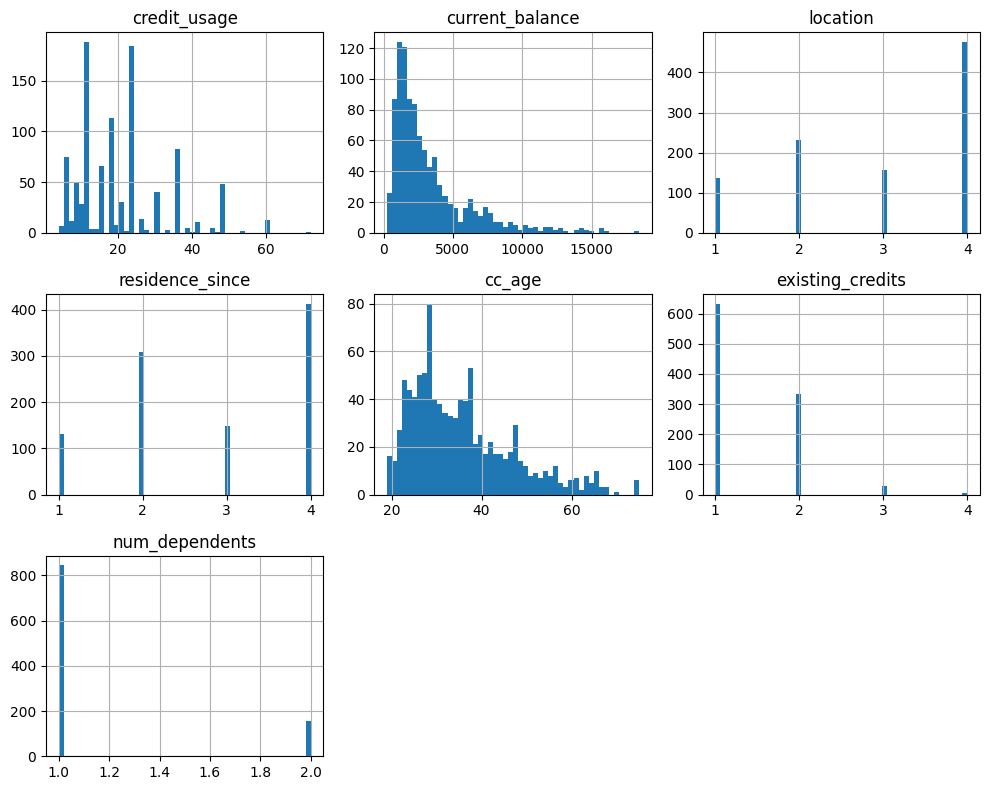

In [103]:
df[var_num].hist(bins=50, figsize=(10, 8))
plt.tight_layout()
plt.show()

Debido a la alta asimetria y el amplio rango del atributo 'current_balance', lo reescalamos aplicando log

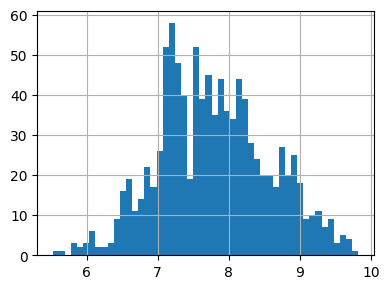

In [104]:
df['current_balance'] = np.log(df['current_balance'])
df['current_balance'].hist(bins=50, figsize=(4, 3))
plt.tight_layout()
plt.show()

In [105]:
print(df['current_balance'].skew())

0.12928589230467


Logramos controla la asimetria y el rango del atributo 
de 1.949628 a 0.12928589230467

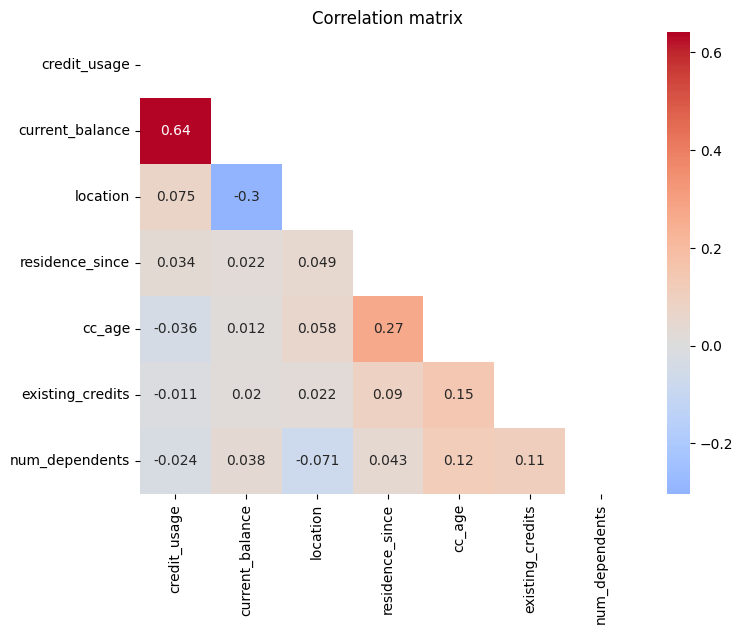

In [106]:
# correlacion para hallar dependecias y redundacias 

corr = df[var_num].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, mask=mask,cmap='coolwarm', center=0)
plt.title('Correlation matrix')
plt.show()

Solo hay los atributos 'current_balance' y 'credit_usage' presentan correclación. Pero no es alta y por tanto podemos considerar ambos atributos en el modelo sin ser redundantes. 

In [107]:
# correlacion con el objetivo para medir utilidad predictiva
df[var_num].corrwith(df.status)

credit_usage        0.214927
current_balance     0.109570
location            0.072404
residence_since     0.002967
cc_age             -0.091127
existing_credits   -0.045732
num_dependents     -0.003015
dtype: float64

Las variables 'residence_since' y 'num_dependents' tiene muy baja correclacion, no son utiles para los modelos.

#### Variables seleccionadas

In [109]:
var_objetivo='status'

var_categoricas=['over_draft','credit_history', 'purpose',
           'Average_Credit_Balance', 'employment',
           'personal_status',
           'property_magnitude', 'other_payment_plans', 
           'housing',]


var_numericas=['credit_usage','current_balance','location',
             'cc_age','existing_credits']